In [1]:
import sys
sys.path.append("../../src/")

In [2]:
import sofa
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Open and plot HRTF

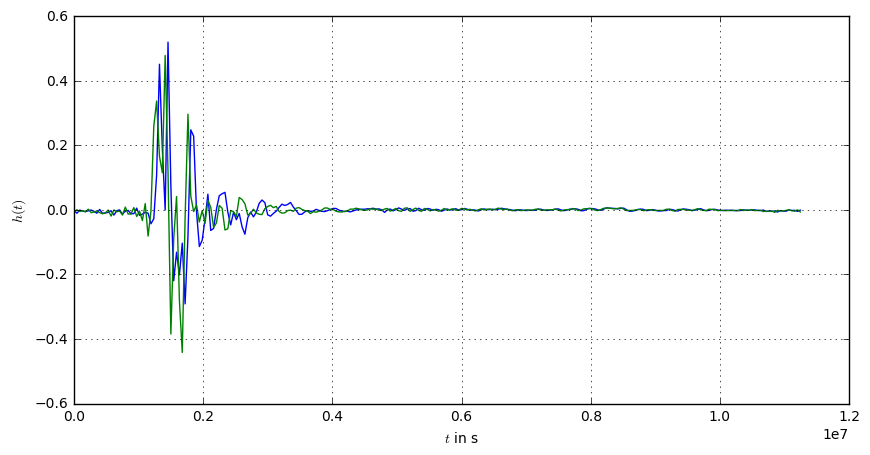

In [3]:
HRTF_path = "MRT01.sofa"
HRTF = sofa.Database.open(HRTF_path)

measurement = 5
emitter = 0

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_value()

plt.figure(figsize=(10, 5))
for receiver in np.arange(HRTF.Dimensions.R):
    plt.plot(t, HRTF.Data.IR.get_values(indices={"M":measurement, "R":receiver, "E":emitter}))
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()

HRTF.close()

## Create new SimpleFreeFieldHRIR .sofa file

SimpleFreeFieldHRIR with fixed Listener and moving Source

In [4]:
HRIR_path = "free_field_HRIR.sofa"
measurement_count = 15

HRIR = sofa.Database.create(HRIR_path, "SimpleFreeFieldHRIR", measurement_count)

HRIR.Listener.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))
HRIR.Receiver.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))
HRIR.Source.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Varying))
HRIR.Emitter.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))

HRIR.Room.initialize()

HRIR.Data.initialize(1000, False)

HRIR.close()

Listener count =  1
Receiver count =  2
Source count =  1
Emitter count =  1
